# Probability models

This notebook contains the code examples for the blog post
[???](???),
which explains how Python can help us better understand probability and statistics concepts. I've reproduced the essential parts of the narrative here (in abridged form) so the notebook should be readable on its own.

The benefit of the notebook version is you can play with the code examples interactively. To run a code cell, press the play button in the menu bar, or use the keyboard shortcut **SHIFT+ENTER**.

### Notebook setup

In [1]:
# Install stats library
%pip install --quiet ministats 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Figures setup
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()  # needed otherwise `sns.set_theme` doesn't work
sns.set_theme(
    style="whitegrid",
    rc={'figure.figsize': (7, 2)},
)
# High-resolution figures please
%config InlineBackend.figure_format = 'retina'

def savefig(fig, filename):
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

<Figure size 640x480 with 0 Axes>

## Introduction

## Probability models

The concept of a random variable, denoted $X$, is a key building block in probability theory. The random variable $X$ is a quantity that can take on different values, and it is described by a probability distribution function $f_X$, which we use to compute the probability of different possible outcomes of the random variable $X$.

When learning about random variables, readers are usually exposed to numerous formulas and equations for describing probability distributions. These math equations can be hard to understand, especially for people who haven't done math recently. Using computer models, however, makes probability concepts much more accessible. Specifically, computers give us two additional points of view of the math equations:

- **Visualizations**. Plotting the probability distribution $f_X$ for the random variable $X$ gives you a visual representation of the possible values this variable can have.
- **Computer-assisted calculations**. Probability calculations can be done easily using Python as a calculator.

## Example 1: discrete random variable

TODO: import from cut material

## Example 2: continuous random variable

### Computer models for random variables

The standard normal distribution is denoted $Z \sim \mathcal{N}(\mu=0,\sigma=1)$,
where $Z$ is the name has the probability density function:

$$
    f_Z(z) = \tfrac{1}{\sqrt{2\pi}} e^{ - \frac{1}{2}z^2}.
$$

The standard normal is a special case of the general normal $\mathcal{N}(\mu, \sigma)$
where $\mu$ is the mean and $\sigma$ is the standard deviation.


We can use the predefined probability model from the Python module `scipy.stats` whenever we need to do probability calculations.
To create a computer model for the standard normal random variable $Z \sim \mathcal{N}(\mu=0, \sigma=1)$,
we need to import the `norm` model family form `scipy.stats`
then create the random variable object `norm(0,1)`.

In [3]:
from scipy.stats import norm
rvZ = norm(0, 1)

The model first parameter is the mean $\mu=0$,
which is also know as the *location* parameter of the distribution–where it is centred.
The second parameter is the standard deviation $\sigma=1$,
which is also known as the *scale* parameter and controls the width.
The Python keyword for the model parameters are `loc` and `scale`,
so another way to create the random variable object `rvZ` is `norm(loc=0, scale=1)`.

The probability density function $f_Z$ is available as the `.pdf` method on the model `rvZ`.

In [4]:
rvZ.pdf(1)

0.24197072451914337

### Probability model visualizations

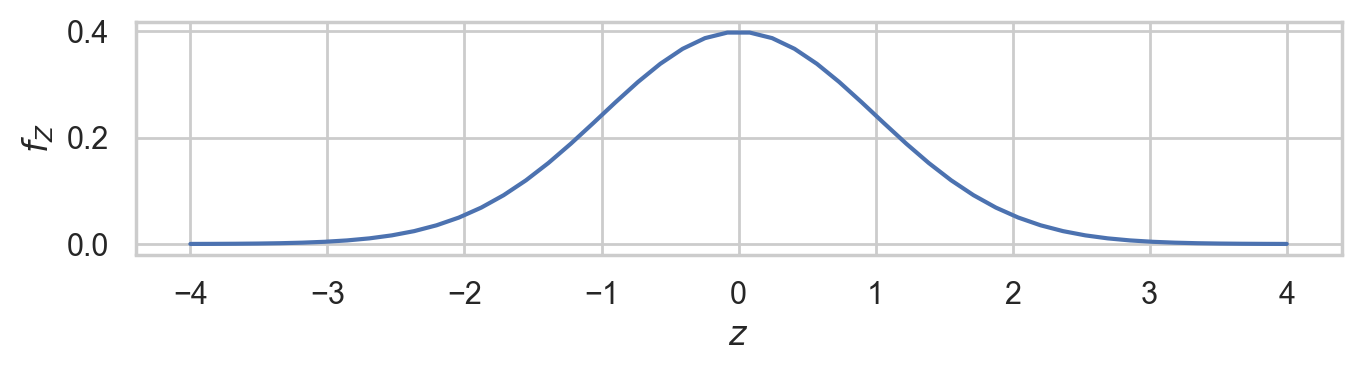

In [5]:
import numpy as np
zs = np.linspace(-4, 4)
fZs = rvZ.pdf(zs)
ax = sns.lineplot(x=zs, y=fZs)
ax.set_xticks(range(-4,5))
ax.set_xlabel("$z$")
ax.set_ylabel("$f_Z$")
savefig(ax.figure, "figures/pdf_of_rvZ.png")

The above graph tells you everything you need to know about the random variable $Z$.
The possible values of $Z$ are concentrated around the mean $\mu=0$.
The region of highest density is roughly between $z=-1$ and $z=1$,
with most of values between $z=-2$ and $z=2$,
then the probability density drops off to (almost) zero for $z<-3$ and $z>3$.

### Doing probability calculations

Calculating probabilities with the continuous random variable $Z$ requires using *integration*,
which the process of computing the total area under a curve for some region.
For example, 
the probability that the random variable $Z$ will have a value somewhere
between $1$ and $2$ is defined as $\textrm{Pr}(\{1 \leq Z \leq 2\}) = \int_{z=1}^{z=2} f_Z(z) dz$.

In [6]:
from scipy.integrate import quad
quad(rvZ.pdf, a=1, b=2)[0]

0.13590512198327787

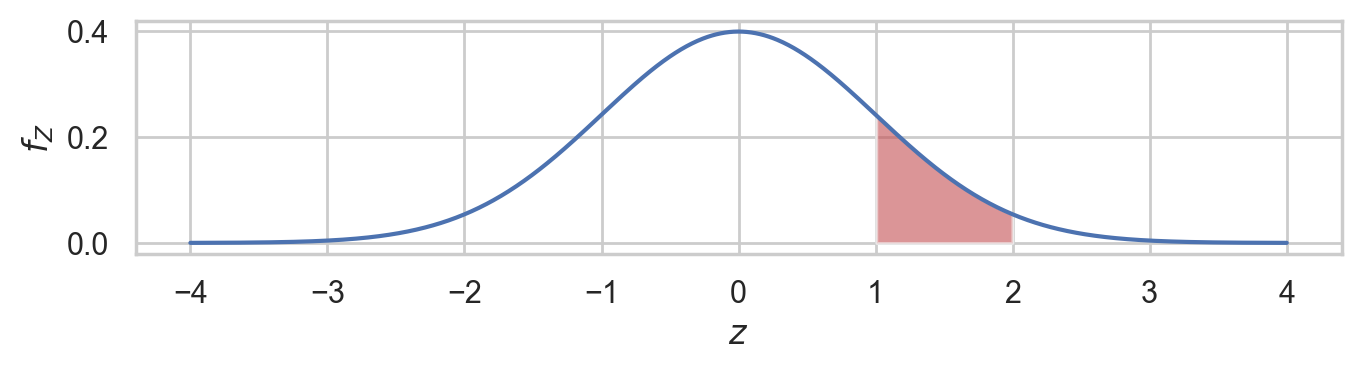

In [7]:
zs = np.linspace(-4, 4, 1000)
fZs = rvZ.pdf(zs)
ax = sns.lineplot(x=zs, y=fZs)
mask = (1 < zs) & (zs < 2)
ax.fill_between(zs[mask], y1=fZs[mask], alpha=0.6, facecolor="C3")
ax.set_xticks(range(-4,5))
ax.set_xlabel("$z$")
ax.set_ylabel("$f_Z$")
# TODO: add text label "$\{1 \leq Z \leq 2\}$" and arrow pointing towards region
savefig(ax.figure, "figures/pdf_of_rvZ_highlight_1_to_2.png")

The probability of the event $\{1 \leq Z \leq 2\}$ corresponds to the area in red.

### Random samples

To generate a random sample of size $n$ from the random variable `rvZ`,
call the method `rvZ.rvs(n)`.

In [8]:
np.random.seed(46)
zs = rvZ.rvs(10)
zs

array([ 0.58487584,  1.23119574,  0.82190026, -0.79922836,  0.41205323,
       -0.17615661, -0.07317197, -0.56566639, -0.09346524,  0.85730108])

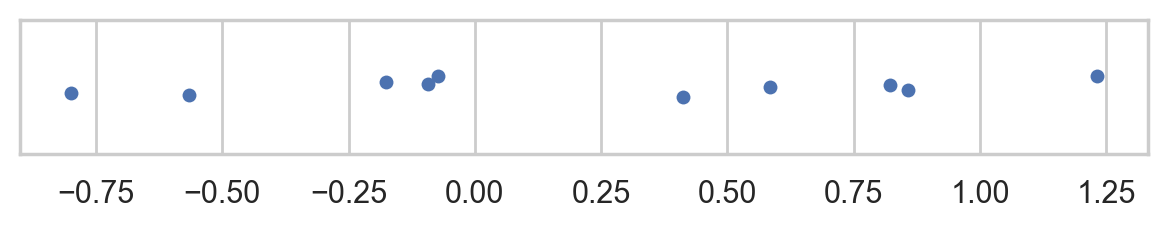

In [9]:
with plt.rc_context({"figure.figsize":(6,1.3)}):
    sns.stripplot(x=zs)
    savefig(plt.gcf(), "figures/sample_from_rvZ_n10.png")

### Normal distributions with different parameters
The standard normal distribution $\mathcal{N}(\mu=0, \sigma=1)$ is just one representative of the family of normal distributions. The mean parameter  $\mu$ (the Greek letter mu) and standard deviation parameter $\sigma$ (the Greek letter sigma) control the shape of the normal distribution. We can experiment with the different choices of parameters for the normal model to see what shape of distribution we get.

Here are some examples of graphs of the normal distribution for different parameters $\mu$ and $\sigma$.

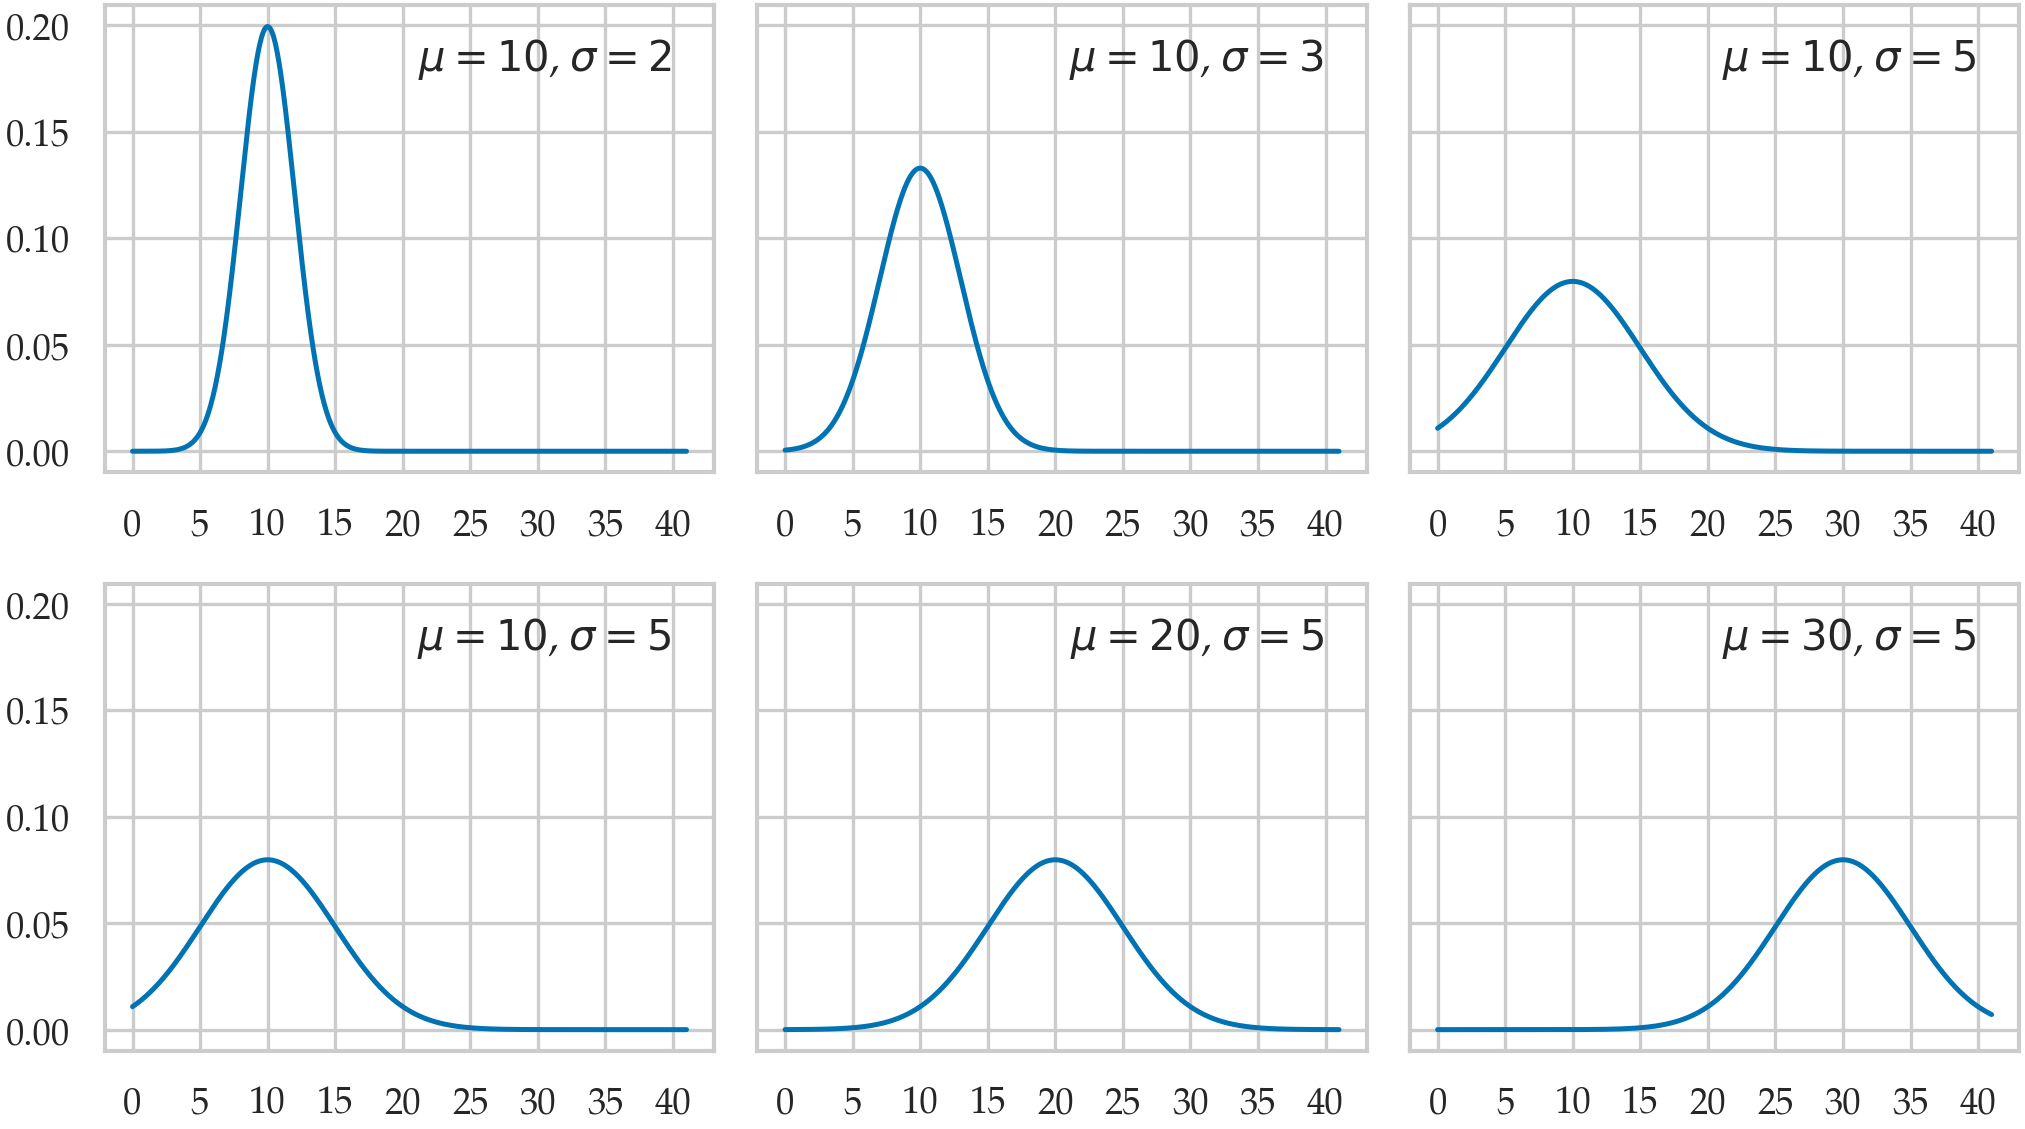


There are many of other probability distributions that can be useful for modelling various real world quantities. You can take a look at the probability graphs
of [discrete distribution here](https://nobsstats.com/notebooks/26_inventory_continuous_dists.html) and [continuous distributions here](https://nobsstats.com/notebooks/23_inventory_discrete_dists.html).

## Applications

## Conclusion

## Links